# Hypothesis Testing

The purpose of the test is to tell if there is any significant difference between two data sets.



## Overview

This module covers,

1) One sample and Two sample t-tests

2) ANOVA

3) Type I and Type II errors

4) Chi-Squared Tests

## Question 1 

*A student is trying to decide between two GPUs. He want to use the GPU for his research to run Deep learning algorithms, so the only thing he is concerned with is speed.*

*He picks a Deep Learning algorithm on a large data set and runs it on both GPUs 15 times, timing each run in hours. Results are given in the below lists GPU1 and GPU2.*

In [1]:
from scipy import stats 
import numpy as np

In [2]:
GPU1 = np.array([11,9,10,11,10,12,9,11,12,9,11,12,9,10,9])
GPU2 = np.array([11,13,10,13,12,9,11,12,12,11,12,12,10,11,13])

#Assumption: Both the datasets (GPU1 & GPU 2) are random, independent, parametric & normally distributed

Hint: You can import ttest function from scipy to perform t tests 

**First T test**

*One sample t-test*

Check if the mean of the GPU1 is equal to zero.
- Null Hypothesis is that mean is equal to zero.
- Alternate hypothesis is that it is not equal to zero.

In [17]:
import scipy.stats as stats
n=15
mu=0
xbar=(np.mean(GPU1))
print('mean is:',xbar)
S=(np.std(GPU1,ddof=1))
se=S/np.sqrt(n)
print('Critical values are:')
print(stats.t.isf(.025,n-1,mu,se))
print(stats.t.isf(.975,n-1,mu,se))
print('P-Value is')
print(stats.t.cdf(xbar,n-1,mu,se))

mean is: 10.333333333333334
Critical values are:
0.6507704546500327
-0.6507704546500326
P-Value is
0.9999999999999964


## Question 2

Given,

Null Hypothesis : There is no significant difference between data sets

Alternate Hypothesis : There is a significant difference

*Do two-sample testing and check whether to reject Null Hypothesis or not.*

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

In [20]:
D=GPU2-GPU1
print(D)
mean = np.mean(D)
sd = np.std(D,ddof=1)
import scipy.stats as stats
t_statistics, p_value = stats.ttest_1samp(D,0)
print('mean is:',mean)
print('standard deviation is:',sd)
print('P Value is:',p_value)
print('P Value is extremely low, hence we reject NULL Hypothesis')

[ 0  4  0  2  2 -3  2  1  0  2  1  0  1  1  4]
mean is: 1.1333333333333333
standard deviation is: 1.7265434778633235
P Value is: 0.02346537162637542
P Value is extremely low, hence we reject NULL Hypothesis


## Question 3

He is trying a third GPU - GPU3.

In [21]:
GPU3 = np.array([9,10,9,11,10,13,12,9,12,12,13,12,13,10,11])

#Assumption: Both the datasets (GPU1 & GPU 3) are random, independent, parametric & normally distributed

*Do two-sample testing and check whether there is significant differene between speeds of two GPUs GPU1 and GPU3.*

#### Answer:

In [23]:
D=GPU3-GPU1
print(D)
mean = np.mean(D)
sd = np.std(D,ddof=1)
import scipy.stats as stats
t_statistics, p_value = stats.ttest_1samp(D,0)
print('mean is:',mean)
print('standard deviation is:',sd)
print('P Value is:',p_value)
print('P Value is more than .05, hence we fail to reject NULL Hypothesis')

[-2  1 -1  0  0  1  3 -2  0  3  2  0  4  0  2]
mean is: 0.7333333333333333
standard deviation is: 1.7915143899851347
P Value is: 0.13520778142018045
P Value is more than .05, hence we fail to reject NULL Hypothesis


## ANOVA

## Question 4 

If you need to compare more than two data sets at a time, an ANOVA is your best bet. 

*The results from three experiments with overlapping 95% confidence intervals are given below, and we want to confirm that the results for all three experiments are not significantly different.*

But before conducting ANOVA, test equality of variances (using Levene's test) is satisfied or not. If not, then mention that we cannot depend on the result of ANOVA

In [25]:
import numpy as np

e1 = np.array([1.595440,1.419730,0.000000,0.000000])
e2 = np.array([1.433800,2.079700,0.892139,2.384740])
e3 = np.array([0.036930,0.938018,0.995956,1.006970])

#Assumption: All the 3 datasets (e1,e2 & e3) are random, independent, parametric & normally distributed

Perform levene test on the data

The Levene test tests the null hypothesis that all input samples are from populations with equal variances. Levene’s test is an alternative to Bartlett’s test bartlett in the case where there are significant deviations from normality.

source: scipy.org

#### Answer:

LeveneResult(statistic=2.6741725711150446, pvalue=0.12259792666001798)
Since P-Value is higher than .05 hence we are failed to reject NULL Hypothesis, i.e. input samples have equal variance


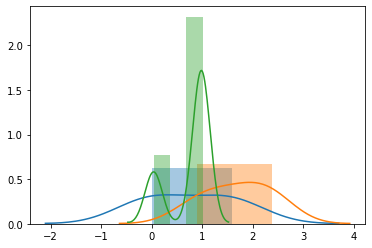

In [30]:
import seaborn as sns
sns.distplot(e1)
sns.distplot(e2)
sns.distplot(e3)

print(stats.levene(e1, e2, e3))
print('Since P-Value is higher than .05 hence we are failed to reject NULL Hypothesis, i.e. input samples have equal variance')

## Question 5

The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean. The test is applied to samples from two or more groups, possibly with differing sizes.

use stats.f_oneway() module to perform one-way ANOVA test

            sum_sq   df         F    PR(>F)
E         2.399066  2.0  2.513576  0.135746
Residual  4.294994  9.0       NaN       NaN
P-Value is higher than alpha .05, hence we can say that there is no significant relation between E and Value


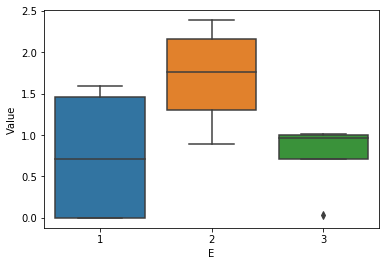

In [49]:
import pandas as pd
data1 = pd.DataFrame()
df1 = pd.DataFrame({'E':'1','Value':e1})
df2 = pd.DataFrame({'E':'2','Value':e2})
df3 = pd.DataFrame({'E':'3','Value':e3})
data1 = data1.append(df1)
data1 = data1.append(df2)
data1 = data1.append(df3)
sns.boxplot(x="E",y="Value",data = data1)
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('Value ~ E', data = data1).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)
print('P-Value is higher than alpha .05, hence we can say that there is no significant relation between E and Value')

## Question 6

*In one or two sentences explain about **TypeI** and **TypeII** errors.*

#### Answer:

When we assume that Null Hypothesis is True but we have to reject Null Hypothesis then it is TypeI error, however when we assume that Null Hypothesis is False but we fail to reject the Null Hypothesis then it is a TypeII error.

## Question 7 

You are a manager of a chinese restaurant. You want to determine whether the waiting time to place an order has changed in the past month from its previous population mean value of 4.5 minutes. 
State the null and alternative hypothesis.

#### Answer:


Null Hypothesis - Waiting time has not changed from its past population mean 4.5
Alternate Hypothesis - Waiting time has changed from its past population mean of 4.5

## Chi square test

## Question 8

Let's create a small dataset for dice rolls of four players

In [56]:
import numpy as np
# Here d1 to d6 are the number of dice and four values in each dice represents value of dice for player 1 to player 4

d1 = [1, 6, 3, 4]
d2 = [2, 5, 1, 3]
d3 = [4, 2, 3, 1]
d4 = [3, 4, 1, 2]
d5 = [1, 6, 3, 5]
d6 = [3, 2, 2, 1]

dice = np.array([d1, d2, d3, d4, d5, d6])
chi_square_Stat, p_value, deg_freedom, exp_freq = stats.chi2_contingency(dice)
print('chi2 stat',chi_square_Stat)
print('p-value',p_value)
print('degree of freedom',deg_freedom)
print('Contigency', exp_freq)

chi2 stat 11.445004959326388
p-value 0.720458335452983
degree of freedom 15
Contigency [[2.88235294 5.14705882 2.67647059 3.29411765]
 [2.26470588 4.04411765 2.10294118 2.58823529]
 [2.05882353 3.67647059 1.91176471 2.35294118]
 [2.05882353 3.67647059 1.91176471 2.35294118]
 [3.08823529 5.51470588 2.86764706 3.52941176]
 [1.64705882 2.94117647 1.52941176 1.88235294]]


run the test using SciPy Stats library

Depending on the test, we are generally looking for a threshold at either 0.05 or 0.01. Our test is significant (i.e. we reject the null hypothesis) if we get a p-value below our threshold.

For our purposes, we’ll use 0.01 as the threshold.

use stats.chi2_contingency() module 

This function computes the chi-square statistic and p-value for the hypothesis test of independence of the observed frequencies in the contingency table

Print the following:

- chi2 stat
- p-value
- degree of freedom
- contingency



## Question 9

### Z-test

Get zscore on the above dice data using stats.zscore module from scipy. Convert zscore values to p-value and take mean of the array.

In [61]:
zscores = stats.zscore(dice, axis = 1)
np.mean(1-stats.norm.cdf(zscores))

0.5011106209807585

## Question 10

A Paired sample t-test compares means from the same group at different times.

The basic two sample t-test is designed for testing differences between independent groups. 
In some cases, you might be interested in testing differences between samples of the same group at different points in time. 
We can conduct a paired t-test using the scipy function stats.ttest_rel(). 

In [62]:
before= stats.norm.rvs(scale=30, loc=100, size=500) ## Creates a normal distribution with a mean value of 100 and std of 30
after = before + stats.norm.rvs(scale=5, loc=-1.25, size=500)

Test whether a weight-loss drug works by checking the weights of the same group patients before and after treatment using above data.

In [65]:
D=after-before
mean = np.mean(D)
sd = np.std(D,ddof=1)
import scipy.stats as stats
t_statistics, p_value = stats.ttest_1samp(D,0)
print('mean is:',mean)
print('standard deviation is:',sd)
print('P Value is:',p_value)
print('P Value is extremely low, hence we reject NULL Hypothesis')

mean is: -0.9884518814659266
standard deviation is: 5.0491757459455915
P Value is: 1.4635679259406082e-05
P Value is extremely low, hence we reject NULL Hypothesis
